# Regresión Logistica

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [2]:
clientes = pd.read_csv("clientes.csv")

# MODELO DE CLASIFICACION PARA PREDICCIONES

### Balanceo de Datos
Para este algoritmo se usará un balanceo de clases diferente, Se igualarán el número de clientes que abandonarón la tarjeta de credito con clientes que no la abandonarón.

In [3]:
clientesSinTarjeta = clientes[clientes["EstadoCuenta"]==0]
clientesConTarjeta = clientes[clientes["EstadoCuenta"]==1].sample(n = clientesSinTarjeta.shape[0])

muestraClientes = pd.concat([clientesConTarjeta, clientesSinTarjeta])

## Obteniendo los datos por filas y haciendo la particion entre datos de entrenamiento y de prueba


In [4]:
x_data = np.array(muestraClientes.iloc[:, 2: muestraClientes.shape[0]])# Omitimos el numero del cliente y el estado de la cuenta

#Normalizando Datos
escalador = preprocessing.MinMaxScaler()
x_data = escalador.fit_transform(x_data)

#Etiquetas de los Datos
y_data = np.array(muestraClientes["EstadoCuenta"])

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3) #0.3 es la proporcion de division

## DEFINIENDO EL ALGORITMO A UTILIZAR

In [18]:
algoritmo = LogisticRegression(class_weight="balanced")

In [19]:
algoritmo.fit(x_train, y_train)

LogisticRegression(class_weight='balanced')

## Realizando predicciones

In [20]:
y_predict = algoritmo.predict(x_test)

## REVISANDO RESULTADOS

C:\Users\Arley\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


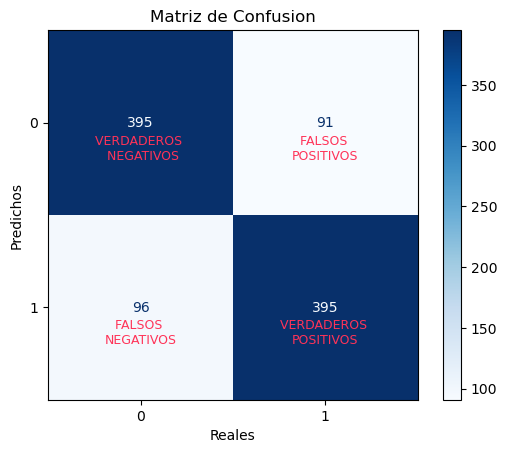

In [21]:
matriz = plot_confusion_matrix(algoritmo, x_test, y_test, cmap=plt.cm.Blues)
matriz.ax_.set_title('Matriz de Confusion')
plt.xlabel('Reales')
plt.ylabel('Predichos')
plt.gcf().axes[0].tick_params()
plt.gcf().axes[1].tick_params()

titulos=[["VERDADEROS \n NEGATIVOS", "FALSOS \nNEGATIVOS"], ["FALSOS \nPOSITIVOS", "VERDADEROS \nPOSITIVOS"]]

for i in range(len(titulos)):
    for j in range(len(titulos)):        
        plt.text(i, j+0.14, titulos[i][j], fontsize=9, ha= "center", va="center", color="#FF3358")

plt.show()

In [22]:
# Porcentaje de aciertos respecto a los resultados negativos (0-Cero), clientes que abandonaron su producto

#Obteniendo los componentes de la matriz de confusión
vn, fp, fn, vp = confusion_matrix(y_test, y_predict).ravel()
(vn, fp, fn, vp)

indice_negativos = (vn*100)/(vn+fn)
print(indice_negativos,"%")

80.44806517311609 %


# Conclusion
* El algoritmo tiene un porcentaje de acierto alto respecto a los clientes con estado cero.